In [39]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from matplotlib import ticker
from utils import get_data

color = {
    0 : 'blue',
    1 : 'green',
    2 : 'red',
    3 : 'black',
    4 : 'magenta',
    5 : 'yellow',
    6 : 'plum',
    7 : 'purple',
    8 : 'gray'
}

seeds = [1,2,3,4,5,6,7,8,9,10]

In [41]:
Configurations = {
    0 : [10],
    1 : [15],
    2 : [30],
    3 : [-15, -1, 0, 1, 15],
    4 : [-15, -5, -1, 0, 1, 5, 15],
    5 : [-15, -10, -5, -1, 0, 1, 5, 10, 15],
    6 : [-15, -10, -5, -2.5, -1, 0, 1, 2.5, 5, 10, 15],
    7 : [-15, -7.5, -5, -2.5, -1, 0, 1, 2.5, 5, 7.5, 15],
    8 : [-15, -10, -7.5, -5, -2.5, -1, 0, 1, 2.5, 5, 7.5, 10, 15],
}

In [46]:
os.chdir('../')
os.getcwd()

'/Users/jeromeroche/Documents/NUS/Thesis/TP/Continuous_Env'

In [47]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20, 10)

In [48]:
directory = 'log_files/wind_map_1/Exp_actions/PPO_7_4_0_1_propulsion_15_4_1_400000/'
scale = 1
bonus = 0

os.chdir(directory)

for cle, valeur in Configurations.items():
    os.chdir('configuration_'+str(cle))

    timesteps, mean_reward, ci_reward, mean_length, ci_length, mean_energy, ci_energy, ref_reward, ref_length, ref_energy = get_data(seeds, scale = scale, bonus = bonus)

     ### Reward plot
    up = []
    down = []
    for i in range(len(timesteps)):
        up.append(mean_reward[i] + ci_reward[i])
        down.append(mean_reward[i] - ci_reward[i])
    if cle == 0:
        ax[0].axhline(y=ref_reward, color='r', linestyle='--', label = 'straight path')
    ax[0].plot(timesteps,mean_reward, color = color[cle], label = 'Configuration '+str(cle))
    ax[0].fill_between(timesteps, down, up, color= color[cle], alpha=.1)
    ax[0].set_xlabel('Timesteps (s)', fontsize = 18)
    ax[0].set_ylabel('Average Reward', fontsize = 18)
    ax[0].set_xlim(0, 400000)
    ax[0].set_ylim(-80000, 0)
    
    ### Energy plot
    up = []
    down = []
    for i in range(len(timesteps)):
        up.append(mean_energy[i] + ci_energy[i])
        down.append(mean_energy[i] - ci_energy[i])
    
    ax[1].plot(timesteps,mean_energy, color = color[cle])
    ax[1].fill_between(timesteps, down, up, color= color[cle], alpha=.1)
    ax[1].axhline(y=ref_energy, color='r', linestyle='--')
    ax[1].set_xlabel('Timesteps', fontsize = 18)
    ax[1].set_ylabel('Average Energy Consumed', fontsize = 18)
    ax[1].set_xlim(0, 400000)
    ax[1].set_ylim(0, 80000)
    
    ### Length plot
    up = []
    down = []
    for i in range(len(timesteps)):
        up.append(mean_length[i] + ci_length[i])
        down.append(mean_length[i] - ci_length[i])
    
    ax[2].plot(timesteps,mean_length, color = color[cle])
    ax[2].fill_between(timesteps, down, up, color= color[cle], alpha=.1)
    ax[2].axhline(y=ref_length, color='r', linestyle='--')
    ax[2].set_xlabel('Timesteps', fontsize = 18)
    ax[2].set_ylabel('Average Length', fontsize = 18)
    #ax[1].set_xlim(0, 400000)
    #ax[1].set_ylim(0, 80000)


    os.chdir('../')
os.chdir('../../../')

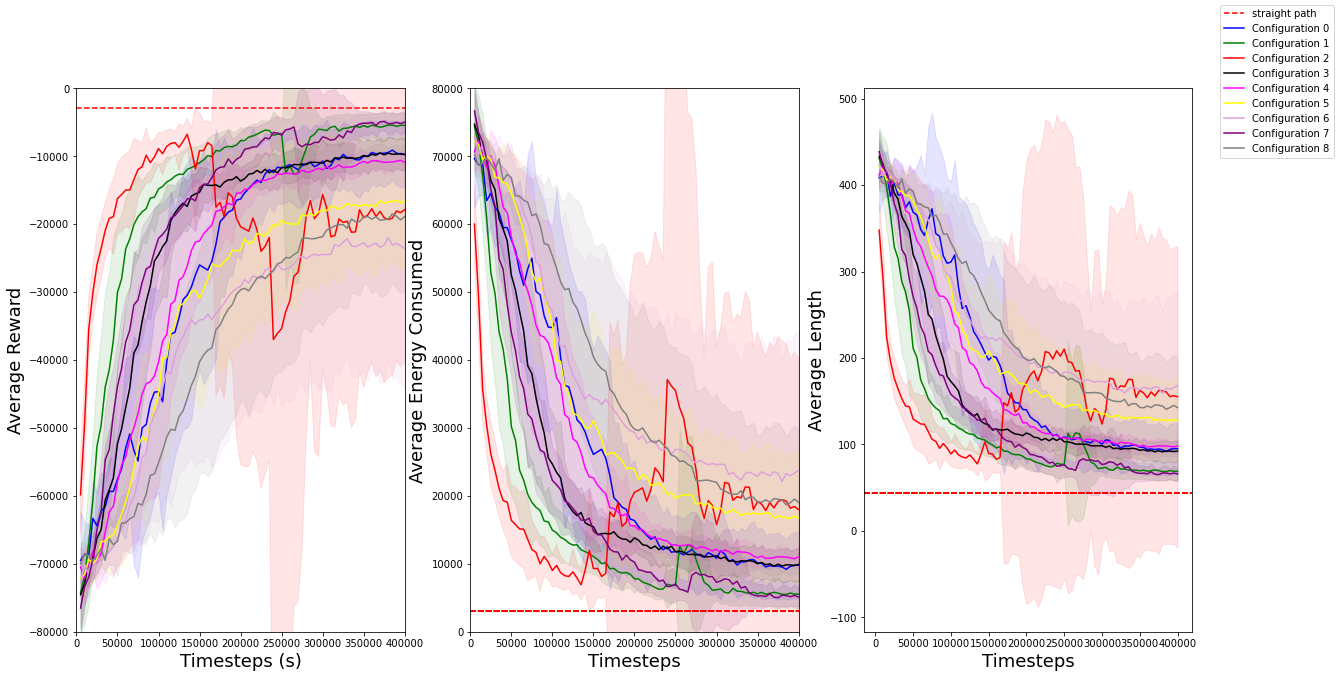

In [49]:

fig.legend()
plt.savefig('reward_1.png')
plt.show()
plt.close(fig)